# Simple Linear Regression & Multiple Linear Regression
Author: Rahul Gupta\
For this section, we will be using a new dataset since the dataset from the previous assignment was not suitable for linear regression. This new dataset contains multiple attributes that influence the price of houses. By using both simple linear regression and multiple linear regression, we can predict the prices of other houses based on attributes such as area population, average number of rooms in the area, and more.

## Simple Linear Regression - Rahul Gupta

### Reading the dataset
First we need to load the dataset into a pandas dataframe so we can display the data, preprocess it, and use it for regression.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_house = pd.read_csv('data/Housing.csv')
df_house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Dataset Observations
Below we can see some basic information about each of the different numerical attributes including the mean and standard deviation. In this case, independent variables would be everything except the house prices, which would be the dependent variable.

In [101]:
df_house.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Distribution Curve
With the price attribute, which is what we will try to predict using regression, we can see that it has a fairly normal distribution without any noticeable skews. Since the data follows a normal distribution, this could potentially make it easier to fit with a regression model.

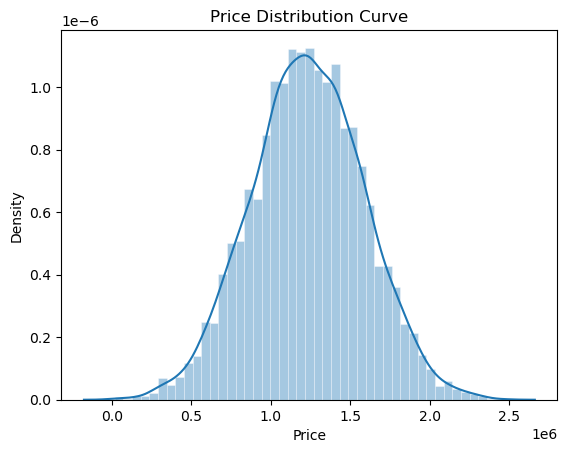

In [102]:
import seaborn as sns

plt.title('Price Distribution Curve')
sns.histplot(df_house['Price'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)
plt.show()

### Preprocessing
Before applying regression, we need to preprocess the data first.

#### Dropping Columns
We can drop the address column since it does not have an impact on house prices. One could argue that a specific address or street could raise or lower the price of the house, but it is far too specific for a regression model that predicts price, and therefore we can drop it.

In [103]:
df_house = df_house.drop(['Address'], axis=1)
df_house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


#### Missing Values
Need to check for missing values and handle them accordingly. In this dataset it appears no values are missing, so we do not need to take action.

In [104]:
missing_values = df_house.isna().sum()
print(missing_values)

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64


#### Normalization & Outliers
For preprocessing, it's important to remove outliers as it could negatively affect the regression model. To remove outliers, we will normalize the dataset first and remove outliers. In this case, we remove 57 entries. 

In [105]:
# Normalize
normal_df = (df_house - df_house.mean())/df_house.std()

# Remove Outliers
normal_df = normal_df.loc[((normal_df > -3).sum(axis=1)==6) & ((normal_df <= 3).sum(axis=1)==6)]

print('Entries before outliers = %d' % (df_house.shape[0]))
print('Entries after outliers = %d' % (normal_df.shape[0]))

Entries before outliers = 5000
Entries after outliers = 4943


### Scatter Plot
Now that the data has been preprocessed we can show a scatter plot. For simple linear regression, we can see the relationship between the average area income and the price of the house. As an initial observation, there is a slight linear relationship, though the points are very scattered. This could be caused by a variety of reasons, one of which could be that other attributes are also influencing this relationship between average area income and price.

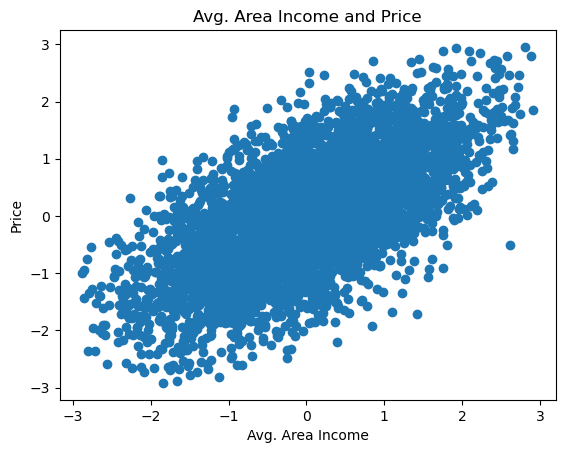

In [106]:
plt.scatter(normal_df['Avg. Area Income'], normal_df['Price'])
plt.title('Avg. Area Income and Price')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()

### Ensuring Extrapolated Data in Testing
As stated in the instructions, the testing data should have x values outside the range of x values in training data so that we can observe how the model behaves with extrapolated data. To do this, I will take the minimum and maximum average area income values and remove them from the dataframe, so they can be used later on in the testing set for extrapolation.

In [107]:
# Get indexes of min and max
min_income_index = normal_df['Avg. Area Income'].idxmin()
max_income_index = normal_df['Avg. Area Income'].idxmax()

# Turn rows into dataframes
min_row = normal_df.loc[[min_income_index]]
max_row = normal_df.loc[[max_income_index]]

# Drop them the min and max, so they will be extrapolated points
no_minmax_df = normal_df.drop(index=min_income_index)
no_minmax_df = no_minmax_df.drop(index=max_income_index)

# Display min row and its data
min_row.iloc[0]

Avg. Area Income               -2.878069
Avg. Area House Age             0.258802
Avg. Area Number of Rooms       0.263586
Avg. Area Number of Bedrooms    1.692413
Area Population                 0.349455
Price                          -0.995900
Name: 4844, dtype: float64

### Splitting Into Training & Testing Data
In order to get our regression line we will need data to train the model. Afterward, we will need test data to test the regression line to see how accurate of a model it is. We will use train_test_split to split the dataset and to get the data into x, y format which will be useful for applying the linear regression model in the next step.

In [108]:
from sklearn.model_selection import train_test_split

X = no_minmax_df[['Avg. Area Income']]
y = no_minmax_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Adding Test Data Outside of Training Range
Before finally applying the regression model, it's important to add some data that is outside the original range of the training data to test extrapolation. Interpolation is basically guaranteed due to the number of entries, even though the data is randomized before the split. However, extrapolation isn't guaranteed, so we need to fix that. 

The minimum and maximum rows I removed from the dataframe during the "Ensuring Extrapolated Data in Testing" section will now be attached to X_test and y_test, so the model will be able to predict it and we can observe the difference between the actual value and the predicted value.

In [109]:
min_x = min_row['Avg. Area Income'].iloc[0]
min_y = min_row['Price'].iloc[0]

max_x = max_row['Avg. Area Income'].iloc[0]
max_y = max_row['Price'].iloc[0]

extrapolated_x = pd.DataFrame({'Avg. Area Income': [min_x, max_x]})
extrapolated_y = pd.Series([min_y, max_y])

X_test = pd.concat([X_test, extrapolated_x], ignore_index=True)
y_test = pd.concat([y_test, extrapolated_y], ignore_index=True)

### Applying Linear Regression Model
Now that we have preprocessed data and split the data into training and testing, we can apply the regression model to the training data. Once we have the regression model, it will be applied to the given x training data and x testing data (average area income) to generate y values (price).

In [110]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicted values for training and testing data
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

### Scatter Plot & Regression Line (Training Data)
A scatter plot of the actual x and y training data with the regression line predicting the y values (price). Though the line goes through the cluster in the center, there are still clearly large residuals.

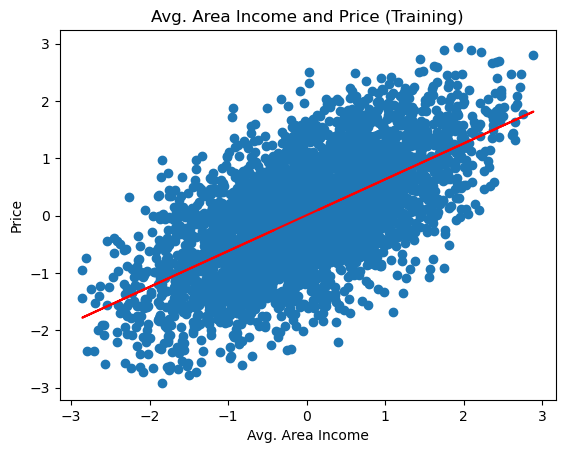

In [111]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train, color="red")
plt.title('Avg. Area Income and Price (Training)')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()

### Scatter Plot & Regression Line (Testing Data)
Same observations as in the training data, but the line seems to be more in the center of the cluster.

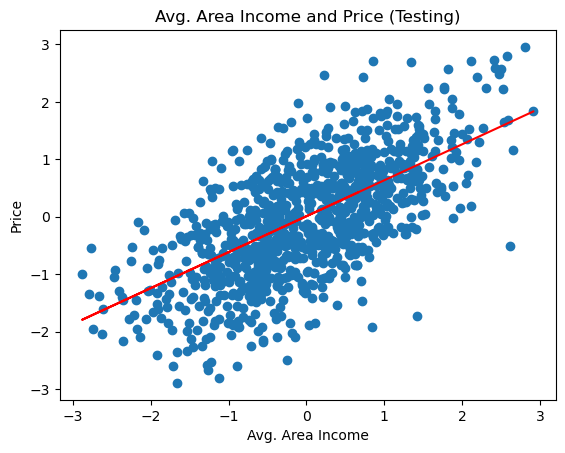

In [112]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test, color = 'red')
plt.title('Avg. Area Income and Price (Testing)')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()

### Extrapolation Predictions
Earlier during the "Adding Test Data Outside of Training Range" section, I added the minimum and maximum x and y values to `X_test` and `y_test` respectively. Since they were the last values added, we can index -1 and -2 to see the last and penultimate predictions and actual values to see how the model deals with extrapolated data.

The larger extrapolated x value prediction was far less accurate than the smaller extrapolated x value, which had an incredibly low residual.

In [113]:
print('Extrapolating a number larger than the range')
print(f'Given x value: {X_test.iloc[-2]}')
print(f'Actual y value: {y_test.iloc[-2]}')
print(f'Predicted y value: {y_pred_test[-2]}')
print(f'Residual: {y_test.iloc[-2] - y_pred_test[-2]}')

Extrapolating a number larger than the range
Given x value: Avg. Area Income   -2.878069
Name: 989, dtype: float64
Actual y value: -0.99590014983198
Predicted y value: -1.7914477278154575
Residual: 0.7955475779834774


In [114]:
print('Extrapolating a number smaller than the range')
print(f'Given x value: {X_test.iloc[-1]}')
print(f'Actual y value: {y_test.iloc[-1]}')
print(f'Predicted y value: {y_pred_test[-1]}')
print(f'Residual: {y_test.iloc[-1] - y_pred_test[-1]}')

Extrapolating a number smaller than the range
Given x value: Avg. Area Income    2.912923
Name: 990, dtype: float64
Actual y value: 1.844734933352616
Predicted y value: 1.8311572913493004
Residual: 0.013577642003315571


### Evaluate Simple Linear Regression
Now that we've applied the regression line to testing data, it's time to see just how accurate it is. For this step, I chose to look at the mean squared error of both the training and testing sets. The closer it is to 1, the more accurate the regression model is.

In [115]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Training set MSE = {mse_train}')
print(f'Testing set MSE = {mse_test}')

Training set MSE = 0.566817577442893
Testing set MSE = 0.5908500746720579


### Conclusion
As we can see with both the training and testing mean squared errors (MSEs), both are quite close to 0, meaning that the simple linear regression model could have the potential to be a good fit when predicting house prices based on the area's average income.

# Multiple Linear Regression
Author: Isaiah

### Fit Regression Model to Training Set
After creating a linear regression object we then fit the regression model to the training set.

In [116]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

LinearRegression()

### Apply Model to the Test Set
With the preprocessed data being split into training and testing, we are now able to apply mulitple linear regression to the test set.

In [117]:
y_pred_test = regr.predict(X_test)

### Evaluate Model Performance on Test Set
Now that we've applied the model to the test set we can then evaluate it. We compare and plot the Average Area Income and Price(test set). Using this we are able to compute the 'Root mean squared error' and 'R-Squared'. 

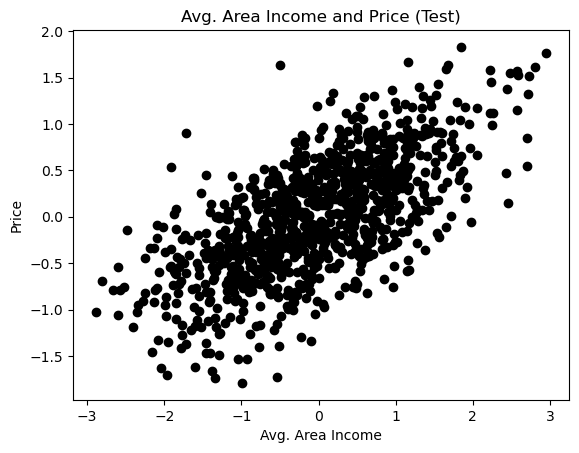

Root mean squared error = 0.7687
R-squared = 0.4294


In [118]:
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Avg. Area Income and Price (Test)')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()


print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

### Post Processing
Using the model we are now able to visualize data. We can then calculate the slope, intercept, and predicted function for the slope. We then plot the test set to visually see this.

Slope =  0.625558671461851
Intercept =  0.00895323388379266


Text(0, 0.5, 'Price')

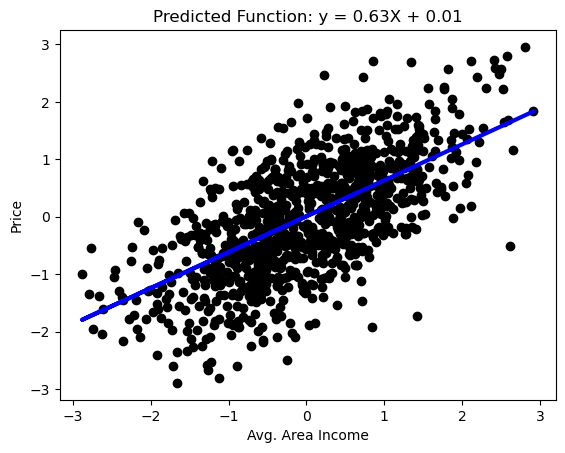

In [119]:
#display model paramters
print('Slope = ', regr.coef_[0] )
print('Intercept = ', regr.intercept_ )

#Plot outputs
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_, regr.intercept_)
plt.title(titlestr)
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')